<a href="https://colab.research.google.com/github/MaximNetolog/index.html-/blob/main/%D0%94%D0%97_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Когда вы пытаетесь загрузить файл на Google Диск, URL-адрес для просмотра файла не работает напрямую для загрузки через pandas.read_csv(). Вместо этого необходимо использовать URL-адрес uc?id=вместо file/d/и viewв конце ссылки.

Это связано с тем, что просмотр файлов через Google Диск создает интерфейс для отображения фрагмента файла, но не обеспечивает прямую ссылку для загрузки с помощью кода. Поэтому для успешной загрузки файла с Google Диска pandasвам необходимо использовать URL uc?id=вместо file/d/и удалить /viewв конце ссылки, чтобы получить прямую ссылку на файл.

# 1. Загрузите файл HR.csv в pandas dataframe

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# загрузим csv файл по ссылке со столбцами:
df = pd.read_csv('https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1', sep=',', engine='python')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [111]:
df.info() # Посмотрим общий вид данных и пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [112]:
print('Количество строк с дубликатами:', df.duplicated().sum())
df.duplicated() # проверим df на наличие дубликатов

Количество строк с дубликатами: 3008


0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [113]:
df[df.duplicated()] # посмотрим на строки с дубликатами

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [114]:
def check_duplicated(df_check): # создадим функцию для проверки df на наличие дубликатов в отдельных столбцах
    if df_check.duplicated().all():
        print('Дубликаты во всех столбцах df')
    elif df_check.duplicated().any():
        print('\n','Дубликаты в отдельных столбцах:\n', '')
        duplicates = pd.DataFrame(index=["sum_duplicates"]) # создадим датафрейм для наполнения
        for column in df_check.columns: # перебирая column, найдём столбцы дуболикатов column_duplicated
            if df_check[column].duplicated().any():
                duplicates[column] = df_check.duplicated([column]).sum()
    else:
        print('Нет дубликатов в df')
    return duplicates

In [115]:
check_duplicated(df)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
sum_duplicates,14907,14934,14993,14784,14991,14997,14997,14997,14989,14996


Сбор статистики не может происходить одновременно по всем сотрудникам. По этому, данные в колонке time_spend_company, может совпадать для сотрудника, который мог уволился, повыситься или перевестись в другой отдел т.д. Отдел мог быть переименован и тогда все его сотрудники рискуют создать дубликаты при опросе. Необходима проверка на одновременные дубликаты по отдельным комбинациям столбцов:

In [116]:
df_no_department = df.drop('department', axis=1)  # для проверки, cоздадим новый DF, без столбца 'department'
df_no_department[df_no_department.duplicated()]  # поиск дубликатов, без столбца 'department'

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
236,0.40,0.53,2,151,3,0,1,0,low
330,0.38,0.57,2,140,3,0,1,0,low
380,0.44,0.45,2,156,3,0,1,0,medium
396,0.46,0.57,2,139,3,0,1,0,low
475,0.45,0.57,2,134,3,0,1,0,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low
14995,0.37,0.48,2,160,3,0,1,0,low
14996,0.37,0.53,2,143,3,0,1,0,low
14997,0.11,0.96,6,280,4,0,1,0,low


In [117]:
check_duplicated(df_no_department)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sum_duplicates,14907,14934,14993,14784,14991,14997,14997,14997,14996


In [118]:
df_no_dep_salary = df.drop(['department', 'salary'], axis=1)  # для проверки, cоздадим новый DF, без столбцов 'department' и 'salary'
df_no_dep_salary[df_no_dep_salary.duplicated()]  # поиск дубликатов, без столбцов 'department' и 'salary'

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
185,0.40,0.46,2,127,3,0,1,0
236,0.40,0.53,2,151,3,0,1,0
271,0.11,0.84,6,251,4,0,1,0
330,0.38,0.57,2,140,3,0,1,0
380,0.44,0.45,2,156,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [119]:
check_duplicated(df_no_dep_salary)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sum_duplicates,14907,14934,14993,14784,14991,14997,14997,14997


In [120]:
df_no_dep_salary_left = df.drop(['department', 'salary', 'left'], axis=1) # сотрудник мог увольняться, исключим столбцы 'department', 'salary', 'left'
df_no_dep_salary_left[df_no_dep_salary_left.duplicated()]  # поиск дубликатов, без столбцов 'department', 'salary', 'left'

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
185,0.40,0.46,2,127,3,0,0
236,0.40,0.53,2,151,3,0,0
271,0.11,0.84,6,251,4,0,0
330,0.38,0.57,2,140,3,0,0
380,0.44,0.45,2,156,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [121]:
check_duplicated(df_no_dep_salary_left)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
sum_duplicates,14907,14934,14993,14784,14991,14997,14997


In [122]:
# Сотрудник мог менять отдел с повышением
# Проверим на дубликаты df, за исключением столбца promotion_last_5years
df_no_dep_salary_left_promotion = df.drop(['department', 'salary', 'left', 'promotion_last_5years'], axis=1)
df_no_dep_salary_left_promotion[df_no_dep_salary_left_promotion.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
185,0.40,0.46,2,127,3,0
236,0.40,0.53,2,151,3,0
271,0.11,0.84,6,251,4,0
330,0.38,0.57,2,140,3,0
380,0.44,0.45,2,156,3,0
...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0
14995,0.37,0.48,2,160,3,0
14996,0.37,0.53,2,143,3,0
14997,0.11,0.96,6,280,4,0


In [123]:
check_duplicated(df_no_dep_salary_left_promotion)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
sum_duplicates,14907,14934,14993,14784,14991,14997


In [124]:
# Возбмём, крайний случай, когда сотрудник получил травму, по этому пепревёлся с повышением в другой отдел.
df_no_dep_salary_left_promotion_accident = df.drop(['department', 'salary', 'left', 'promotion_last_5years', 'Work_accident'], axis=1)
df_no_dep_salary_left_promotion_accident[df_no_dep_salary_left_promotion_accident.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
185,0.40,0.46,2,127,3
236,0.40,0.53,2,151,3
271,0.11,0.84,6,251,4
330,0.38,0.57,2,140,3
380,0.44,0.45,2,156,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [125]:
check_duplicated(df_no_dep_salary_left_promotion_accident)


 Дубликаты в отдельных столбцах:
 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
sum_duplicates,14907,14934,14993,14784,14991


Даже для самых невероятных случаев, нет дубликатов одновременно во всех столбцах, по этому, можно считать, что дубликатов нет и все строки уникальны.

Проверим df на ономальные значения, для этого посмотрим основные статистические характеристики:

In [126]:
df.describe() # Посмотрим основные статистические характеристики. На  min и max для борьбы с выбросами и аномалиями. Ананомалии не только вне min-max

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Отрицательных элементов нет, это означает, что выбросов по min нет. Максимальные значения, также актуальны для своих столбцов, аномалий и выбросов не наблюдаются.

Заметно, что для столбцов: Work_accident, left, promotion_last_5years существуют только бинарные значения, посмотрим их распределение:

<ipython-input-127-aa9acbca7505>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Work_accident", palette="Reds")


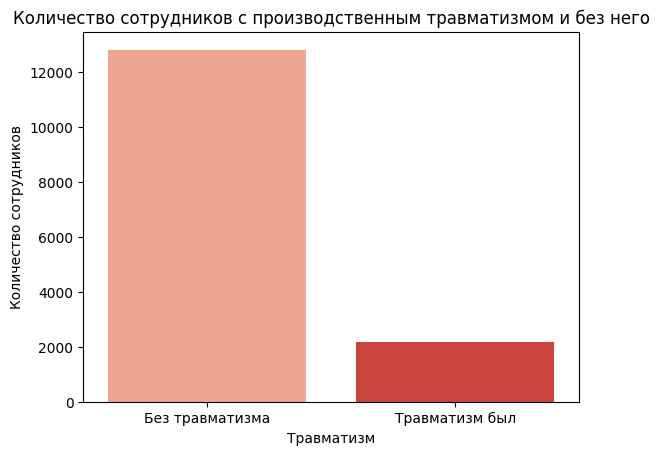

In [127]:
sns.countplot(data=df, x="Work_accident", palette="Reds")
plt.title("Количество сотрудников с производственным травматизмом и без него") # название графика
plt.ylabel("Количество сотрудников") # название оси Y
plt.xlabel("Травматизм") # название оси X
plt.xticks([0,1],["Без травматизма","Травматизм был"]) # присваиваем название каждому уникальномузначению по оси X
plt.show()

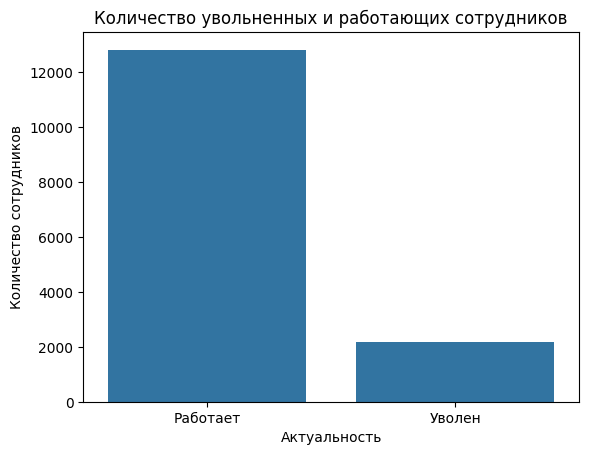

In [128]:
sns.countplot(data=df, x="Work_accident")
plt.title("Количество увольненных и работающих сотрудников")
plt.ylabel("Количество сотрудников")
plt.xlabel("Актуальность")
plt.xticks([0,1],["Работает","Уволен"])
plt.show()

<ipython-input-129-b357ef4fe7e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="promotion_last_5years", palette="Greens")


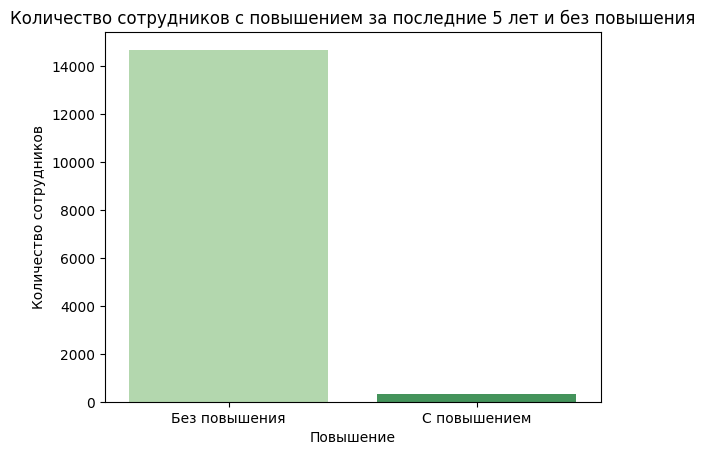

In [129]:
sns.countplot(data=df, x="promotion_last_5years", palette="Greens")
plt.title("Количество сотрудников с повышением за последние 5 лет и без повышения")
plt.ylabel("Количество сотрудников")
plt.xlabel("Повышение")
plt.xticks([0,1],["Без повышения","С повышением"])
plt.show()

In [130]:
# поменяем тип данных с int64 на оbject, в столбцах: Work_accident, left, promotion_last_5years с перезаписью в df[]=df[].astype('object')
df['Work_accident'] = df['Work_accident'].astype('object')
df['left'] = df['left'].astype('object')
df['promotion_last_5years'] = df['promotion_last_5years'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  object 
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  object 
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


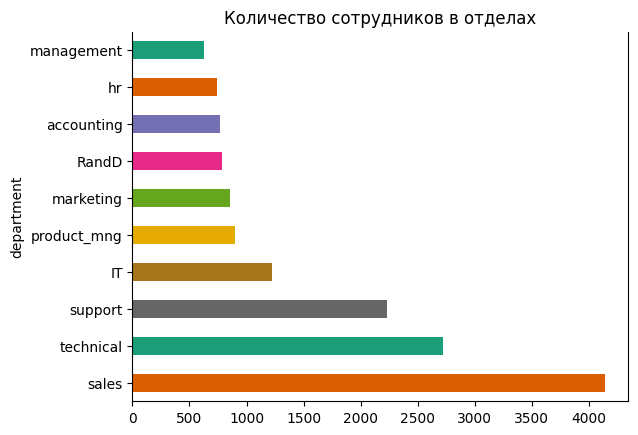

In [131]:
df.groupby('department').size().sort_values().plot(kind='barh', color=sns.color_palette('Dark2')) # .sort_values() - упорядочит по количеству сотрудников
plt.title('Количество сотрудников в отделах')
plt.gca().spines['top'].set_visible(False)
plt.gca().invert_yaxis() # для наглядности, перевернём верх и низ

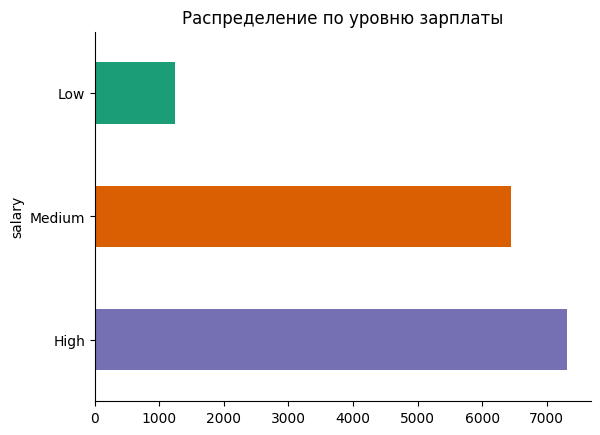

In [132]:
df.groupby('salary').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение по уровню зарплаты')
plt.gca().set_yticklabels(['Low', 'Medium', 'High'])
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().invert_yaxis() # для наглядности, перевернём верх и низ

# 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [133]:
df.describe(include=['object']) # статистика категориальных данных include=['object']

,Work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


In [134]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


# 3. Построим корреляционную матрицу для числовых признаков. Для категориальных признаков, корреляционная матрица не применяется, т.к. корреляция измеряет линейную зависимость между числовыми переменными.

In [135]:
df_num = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']] # Построим матрицу корреляции числовых данных
correlation_matrix = df_num.corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


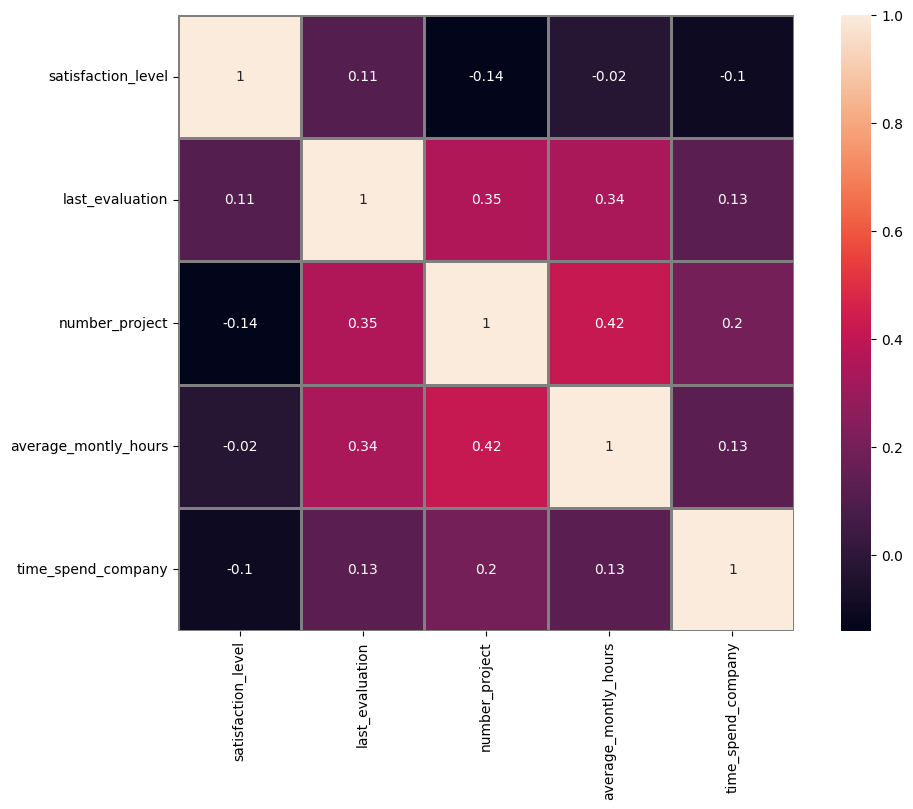

In [136]:
plt.figure(figsize= (12, 8))
sns.heatmap(df_num.corr().round(2), annot = True, square = True, linewidths=1, linecolor='gray'); # покажем матрицу корреляции

In [137]:
correlation_matrix_array = correlation_matrix.abs().to_numpy() # для поиска индексов в матрице, преобразуем DataFrame в массив NumPy

min_corr_index = np.unravel_index(np.argmin(correlation_matrix_array), correlation_matrix_array.shape)
np.fill_diagonal(correlation_matrix_array, 0) # Заменяем единицы по диагонали на нули
max_corr_index = np.unravel_index(np.argmax(correlation_matrix_array), correlation_matrix_array.shape)

feature1_index_min, feature2_index_min = min_corr_index # Индексы для минимальной корреляции

feature1_index_max, feature2_index_max = max_corr_index # Индексы для максимальной корреляции

print(f"Признаки с максимальной корреляцией: \n {df_num.columns[feature1_index_max]},\n {df_num.columns[feature2_index_max]},\n")
print(f"Признаки с минимальной корреляцией: \n {df_num.columns[feature1_index_min]},\n {df_num.columns[feature2_index_min]}")

Признаки с максимальной корреляцией: 
 number_project,
 average_montly_hours,

Признаки с минимальной корреляцией: 
 satisfaction_level,
 average_montly_hours


# 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [138]:
df_department = pd.DataFrame() # создадим датафрейм для заполненияколичеством работников по отделам
df_department["кол-во работников"] = df.groupby('department').size().sort_values() # .plot(kind='barh', color=sns.color_palette('Dark2')) Сгруппируем df по [department] с подсчетом строк и сортировкой по убыванию с помощью sort_values().
df_department

,кол-во работников
department,
management,630
hr,739
accounting,767
RandD,787
marketing,858
product_mng,902
IT,1227
support,2229
technical,2720


# 5. Показать распределение сотрудников по зарплатам

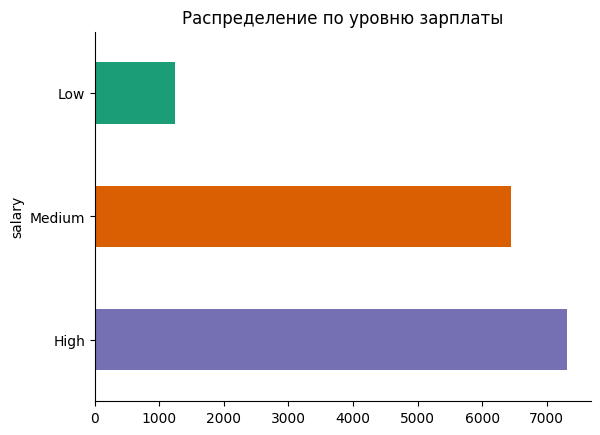

In [139]:
df.groupby('salary').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) # гистаграмма распределения по ЗП
plt.title('Распределение по уровню зарплаты')
plt.gca().set_yticklabels(['Low', 'Medium', 'High'])
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().invert_yaxis()


# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [140]:
group_dep = df.groupby(['department', 'salary']).size().unstack() # сгруппируем df по department с последующей группировкой по salary,
# где .unstack() - разносит на столбцы сводной таблицы готовые суммы (размеры .size()) для каждой группы department
group_dep

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


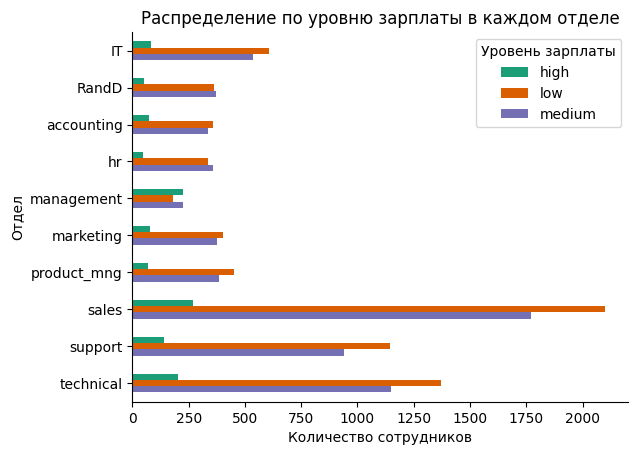

In [141]:
group_dep.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(group_dep.columns))) # где len - кол-во столбцов в датафрейме grouped_df
plt.title('Распределение по уровню зарплаты в каждом отделе')
plt.ylabel('Отдел')
plt.xlabel('Количество сотрудников')
plt.gca().invert_yaxis() # инвертируем ось Х
plt.legend(title='Уровень зарплаты') # легенда датафрейма
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# 7. Выдвиним гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
Для этого создадим из df, новый датафрейм с двумя столбцами: оклад и время работы. Отфильтруем по колонке "оклад" только значения с high и low. Создадим сводную таблицу, перенеся значения времени работы в колонки для каждого класса "оклад" (high и low).

In [142]:
time_sal_h = df[df['salary'] == 'high']['average_montly_hours'].reset_index(drop=True) # отфильтруем по колонке "оклад" только значения с high
time_sal_h = pd.DataFrame(time_sal_h).rename(columns={'average_montly_hours': 'high_salary'}) # переименуем колонку
time_sal_h

,high_salary
0,149
1,289
2,156
3,129
4,149
...,...
1232,148
1233,130
1234,159
1235,131


In [143]:
time_sal_l = df[df['salary'] == 'low']['average_montly_hours'].reset_index(drop=True) # отфильтруем по колонке "оклад" только значения с low
time_sal_l = pd.DataFrame(time_sal_l).rename(columns={'average_montly_hours': 'low_salary'})
time_sal_l

,low_salary
0,157
1,223
2,159
3,153
4,247
...,...
7311,151
7312,160
7313,143
7314,280


In [144]:
time_sal = pd.concat([time_sal_h, time_sal_l], axis = 1) # полностью соединим два датафрейма в один методом concat
time_sal

,high_salary,low_salary
0,149.0,157
1,289.0,223
2,156.0,159
3,129.0,153
4,149.0,247
...,...,...
7311,NaN,151
7312,NaN,160
7313,NaN,143
7314,NaN,280


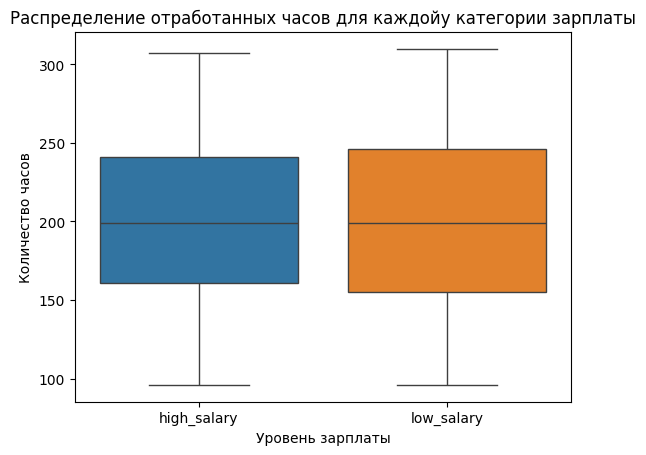

In [145]:
sns.boxplot(data=time_sal) # построим диаграмму размаха
plt.title('Распределение отработанных часов для каждойу категории зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество часов')
plt.show()

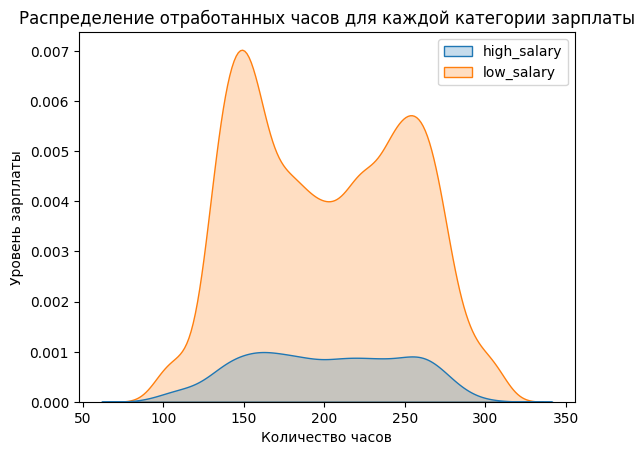

In [146]:
sns.kdeplot(time_sal, fill = True)
plt.title('Распределение отработанных часов для каждой категории зарплаты')
plt.ylabel('Уровень зарплаты')
plt.xlabel('Количество часов')
plt.show()

In [147]:
time_sal.describe() # посчитаем статистические характеристики для каждого уровня зарплаты

,high_salary,low_salary
count,1237.000000,7316.000000
mean,199.867421,200.996583
std,47.710446,50.832214
min,96.000000,96.000000
25%,161.000000,155.000000
50%,199.000000,199.000000
75%,241.000000,246.000000
max,307.000000,310.000000


# На графике ярко выраженное бимодальное распределение low_salary, возможно, произошло наложение данных. Удалим найденные дубликаты и проведём анализ заново.

In [148]:
df_no_department[df_no_department.duplicated()]  # поиск дубликатов, без столбца 'department'

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
236,0.40,0.53,2,151,3,0,1,0,low
330,0.38,0.57,2,140,3,0,1,0,low
380,0.44,0.45,2,156,3,0,1,0,medium
396,0.46,0.57,2,139,3,0,1,0,low
475,0.45,0.57,2,134,3,0,1,0,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low
14995,0.37,0.48,2,160,3,0,1,0,low
14996,0.37,0.53,2,143,3,0,1,0,low
14997,0.11,0.96,6,280,4,0,1,0,low


In [149]:
duplicated_df = df_no_department[df_no_department.duplicated()]  # лишние строки

In [150]:
df = pd.concat([df, duplicated_df]).drop_duplicates(keep=False) # Уберём дубликаты из df с помощью обьединением df и duplicated_df. df потеряет строки с таким же индексом как в duplicated_df

In [151]:
df.describe() # Посмотрим основные статистические характеристики. На  min и max для борьбы с выбросами и аномалиями. Ананомалии не только вне min-max

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,11328.00000,11328.000000,11328.000000,11328.000000,11328.000000
mean,0.64069,0.716905,3.802260,200.098958,3.334746
std,0.23512,0.166388,1.112981,47.863452,1.341576
min,0.09000,0.360000,2.000000,96.000000,2.000000
25%,0.50000,0.570000,3.000000,159.000000,2.000000
50%,0.67000,0.720000,4.000000,199.000000,3.000000
75%,0.83000,0.860000,5.000000,242.000000,4.000000
max,1.00000,1.000000,7.000000,310.000000,10.000000


Отрицательных элементов нет, это означает, что выбросов по min нет. Максимальные значения, также актуальны для своих столбцов, аномалий и выбросов не наблюдаются.

Заметно, что для столбцов: Work_accident, left, promotion_last_5years существуют только бинарные значения, посмотрим их распределение:

<ipython-input-152-aa9acbca7505>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Work_accident", palette="Reds")


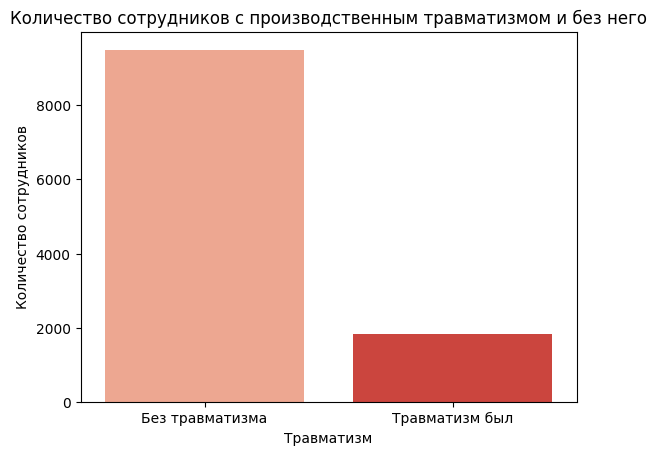

In [152]:
sns.countplot(data=df, x="Work_accident", palette="Reds")
plt.title("Количество сотрудников с производственным травматизмом и без него") # название графика
plt.ylabel("Количество сотрудников") # название оси Y
plt.xlabel("Травматизм") # название оси X
plt.xticks([0,1],["Без травматизма","Травматизм был"]) # присваиваем название каждому уникальномузначению по оси X
plt.show()

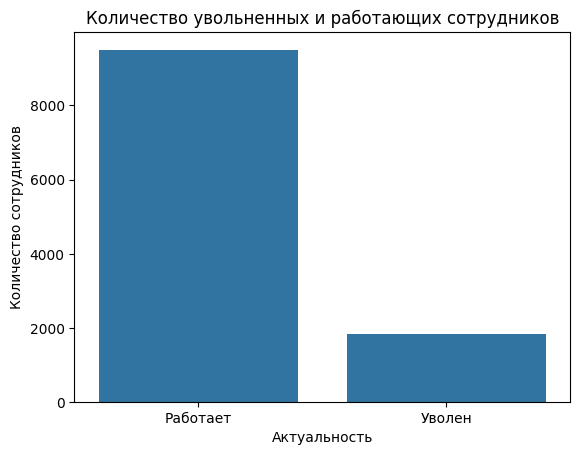

In [153]:
sns.countplot(data=df, x="Work_accident")
plt.title("Количество увольненных и работающих сотрудников")
plt.ylabel("Количество сотрудников")
plt.xlabel("Актуальность")
plt.xticks([0,1],["Работает","Уволен"])
plt.show()

<ipython-input-154-b357ef4fe7e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="promotion_last_5years", palette="Greens")


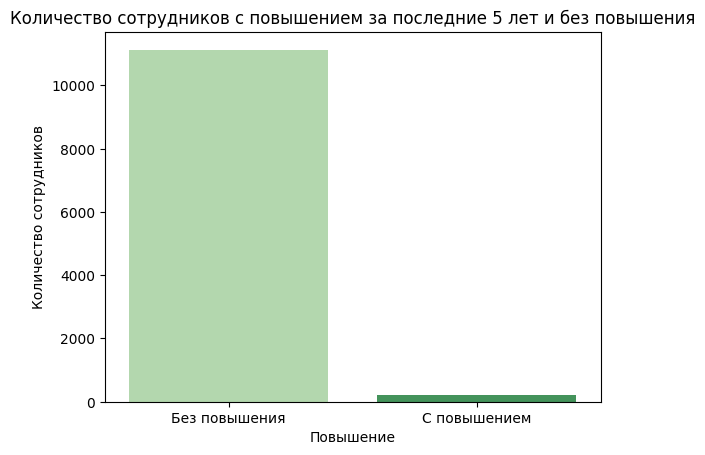

In [154]:
sns.countplot(data=df, x="promotion_last_5years", palette="Greens")
plt.title("Количество сотрудников с повышением за последние 5 лет и без повышения")
plt.ylabel("Количество сотрудников")
plt.xlabel("Повышение")
plt.xticks([0,1],["Без повышения","С повышением"])
plt.show()

In [155]:
# поменяем тип данных с int64 на оbject, в столбцах: Work_accident, left, promotion_last_5years с перезаписью в df[]=df[].astype('object')
df['Work_accident'] = df['Work_accident'].astype('object')
df['left'] = df['left'].astype('object')
df['promotion_last_5years'] = df['promotion_last_5years'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11328 entries, 783 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11328 non-null  float64
 1   last_evaluation        11328 non-null  float64
 2   number_project         11328 non-null  int64  
 3   average_montly_hours   11328 non-null  int64  
 4   time_spend_company     11328 non-null  int64  
 5   Work_accident          11328 non-null  object 
 6   left                   11328 non-null  object 
 7   promotion_last_5years  11328 non-null  object 
 8   department             9653 non-null   object 
 9   salary                 11328 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 973.5+ KB


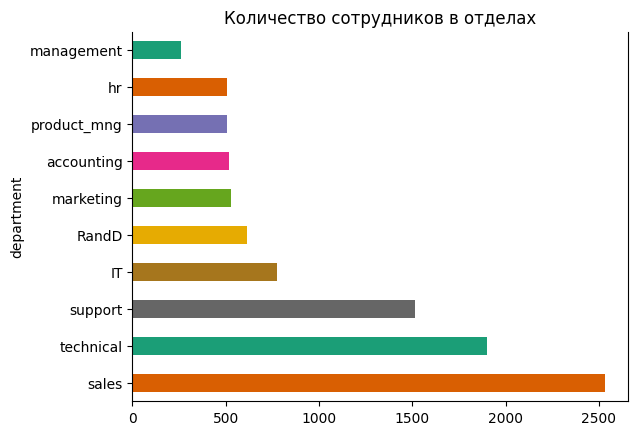

In [156]:
df.groupby('department').size().sort_values().plot(kind='barh', color=sns.color_palette('Dark2')) # .sort_values() - упорядочит по количеству сотрудников
plt.title('Количество сотрудников в отделах')
plt.gca().spines['top'].set_visible(False)
plt.gca().invert_yaxis() # для наглядности, перевернём верх и низ

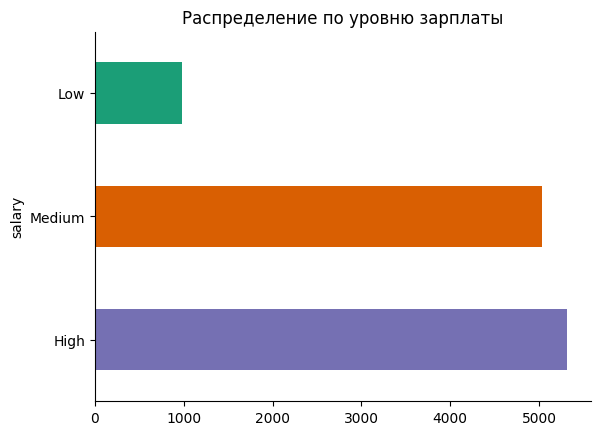

In [157]:
df.groupby('salary').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение по уровню зарплаты')
plt.gca().set_yticklabels(['Low', 'Medium', 'High'])
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().invert_yaxis() # для наглядности, перевернём верх и низ

# 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)

In [158]:
df.describe(include=['object']) # статистика категориальных данных include=['object']

,Work_accident,left,promotion_last_5years,department,salary
count,11328,11328,11328,9653,11328
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,9506,10001,11130,2532,5315


In [159]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,11328.00000,11328.000000,11328.000000,11328.000000,11328.000000
mean,0.64069,0.716905,3.802260,200.098958,3.334746
std,0.23512,0.166388,1.112981,47.863452,1.341576
min,0.09000,0.360000,2.000000,96.000000,2.000000
25%,0.50000,0.570000,3.000000,159.000000,2.000000
50%,0.67000,0.720000,4.000000,199.000000,3.000000
75%,0.83000,0.860000,5.000000,242.000000,4.000000
max,1.00000,1.000000,7.000000,310.000000,10.000000


# 3. Построим корреляционную матрицу для числовых признаков. Для категориальных признаков, корреляционная матрица не применяется, т.к. корреляция измеряет линейную зависимость между числовыми переменными.

In [160]:
df_num = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']] # Построим матрицу корреляции числовых данных
correlation_matrix = df_num.corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.087870,-0.127450,0.005969,-0.168435
last_evaluation,0.087870,1.000000,0.211091,0.214736,0.062420
number_project,-0.127450,0.211091,1.000000,0.265643,0.164362
average_montly_hours,0.005969,0.214736,0.265643,1.000000,0.070665
time_spend_company,-0.168435,0.062420,0.164362,0.070665,1.000000


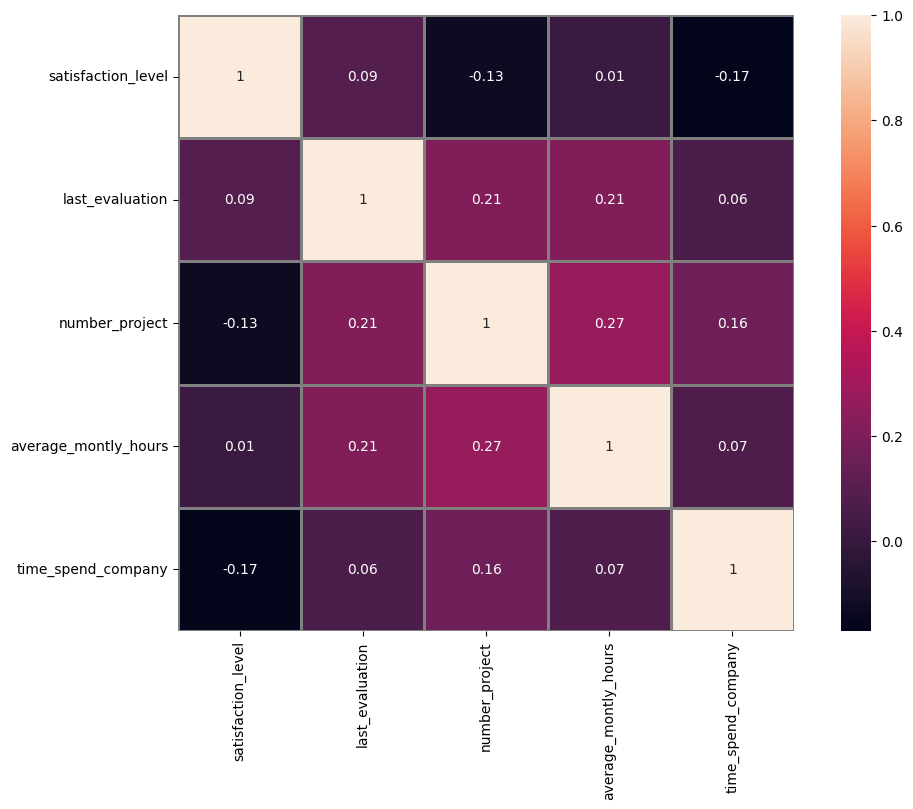

In [161]:
plt.figure(figsize= (12, 8))
sns.heatmap(df_num.corr().round(2), annot = True, square = True, linewidths=1, linecolor='gray'); # покажем матрицу корреляции

In [162]:
correlation_matrix_array = correlation_matrix.abs().to_numpy() # для поиска индексов в матрице, преобразуем DataFrame в массив NumPy

min_corr_index = np.unravel_index(np.argmin(correlation_matrix_array), correlation_matrix_array.shape)
np.fill_diagonal(correlation_matrix_array, 0) # Заменяем единицы по диагонали на нули
max_corr_index = np.unravel_index(np.argmax(correlation_matrix_array), correlation_matrix_array.shape)

feature1_index_min, feature2_index_min = min_corr_index # Индексы для минимальной корреляции

feature1_index_max, feature2_index_max = max_corr_index # Индексы для максимальной корреляции

print(f"Признаки с максимальной корреляцией: \n {df_num.columns[feature1_index_max]},\n {df_num.columns[feature2_index_max]},\n")
print(f"Признаки с минимальной корреляцией: \n {df_num.columns[feature1_index_min]},\n {df_num.columns[feature2_index_min]}")

Признаки с максимальной корреляцией: 
 number_project,
 average_montly_hours,

Признаки с минимальной корреляцией: 
 satisfaction_level,
 average_montly_hours


# 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [163]:
df_department = pd.DataFrame() # создадим датафрейм для заполненияколичеством работников по отделам
df_department["кол-во работников"] = df.groupby('department').size().sort_values() # .plot(kind='barh', color=sns.color_palette('Dark2')) Сгруппируем df по [department] с подсчетом строк и сортировкой по убыванию с помощью sort_values().
df_department

,кол-во работников
department,
management,258
hr,508
product_mng,508
accounting,517
marketing,526
RandD,616
IT,774
support,1515
technical,1899


# 5. Показать распределение сотрудников по зарплатам

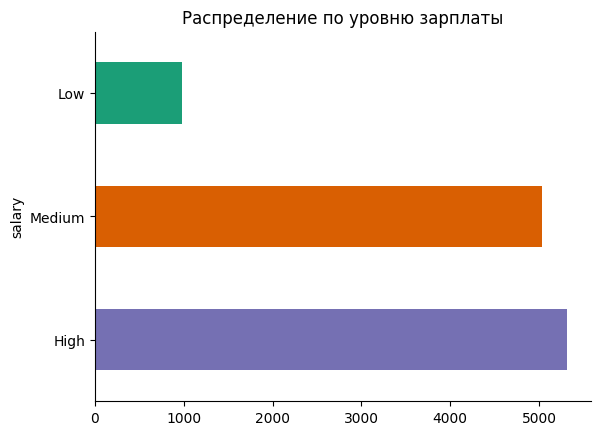

In [164]:
df.groupby('salary').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2')) # гистаграмма распределения по ЗП
plt.title('Распределение по уровню зарплаты')
plt.gca().set_yticklabels(['Low', 'Medium', 'High'])
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().invert_yaxis()


# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [165]:
group_dep = df.groupby(['department', 'salary']).size().unstack() # сгруппируем df по department с последующей группировкой по salary,
# где .unstack() - разносит на столбцы сводной таблицы готовые суммы (размеры .size()) для каждой группы department
group_dep

salary,high,low,medium
department,,,
IT,59,380,335
RandD,43,281,292
accounting,53,253,211
hr,32,270,206
management,31,109,118
marketing,47,240,239
product_mng,37,254,217
sales,205,1172,1155
support,112,673,730


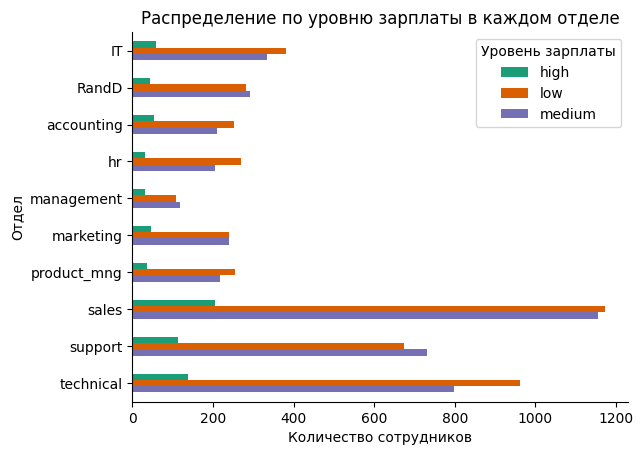

In [166]:
group_dep.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(group_dep.columns))) # где len - кол-во столбцов в датафрейме grouped_df
plt.title('Распределение по уровню зарплаты в каждом отделе')
plt.ylabel('Отдел')
plt.xlabel('Количество сотрудников')
plt.gca().invert_yaxis() # инвертируем ось Х
plt.legend(title='Уровень зарплаты') # легенда датафрейма
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# 7. Выдвиним гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
Для этого создадим из df, новый датафрейм с двумя столбцами: оклад и время работы. Отфильтруем по колонке "оклад" только значения с high и low. Создадим сводную таблицу, перенеся значения времени работы в колонки для каждого класса "оклад" (high и low).

In [167]:
time_sal_h = df[df['salary'] == 'high']['average_montly_hours'].reset_index(drop=True) # отфильтруем по колонке "оклад" только значения с high
time_sal_h = pd.DataFrame(time_sal_h).rename(columns={'average_montly_hours': 'high_salary'}) # переименуем колонку
time_sal_h

,high_salary
0,139
1,217
2,237
3,271
4,130
...,...
971,185
972,172
973,159
974,131


In [168]:
time_sal_l = df[df['salary'] == 'low']['average_montly_hours'].reset_index(drop=True) # отфильтруем по колонке "оклад" только значения с low
time_sal_l = pd.DataFrame(time_sal_l).rename(columns={'average_montly_hours': 'low_salary'})
time_sal_l

,low_salary
0,132
1,131
2,248
3,225
4,156
...,...
5310,293
5311,151
5312,143
5313,280


In [169]:
time_sal = pd.concat([time_sal_h, time_sal_l], axis = 1) # полностью соединим два датафрейма в один методом concat
time_sal

,high_salary,low_salary
0,139.0,132
1,217.0,131
2,237.0,248
3,271.0,225
4,130.0,156
...,...,...
5310,NaN,293
5311,NaN,151
5312,NaN,143
5313,NaN,280


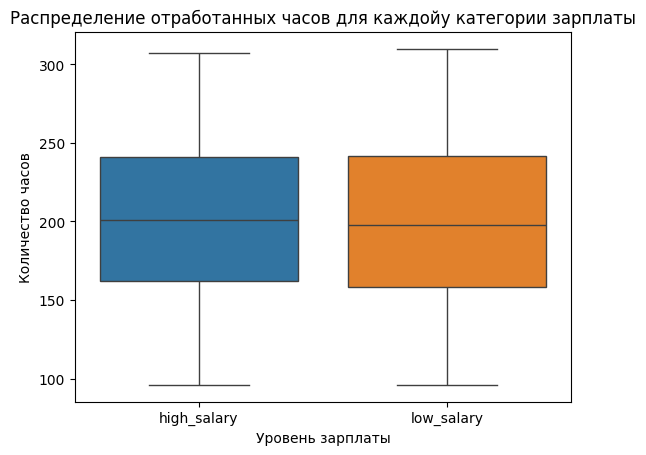

In [170]:
sns.boxplot(data=time_sal) # построим диаграмму размаха
plt.title('Распределение отработанных часов для каждойу категории зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество часов')
plt.show()

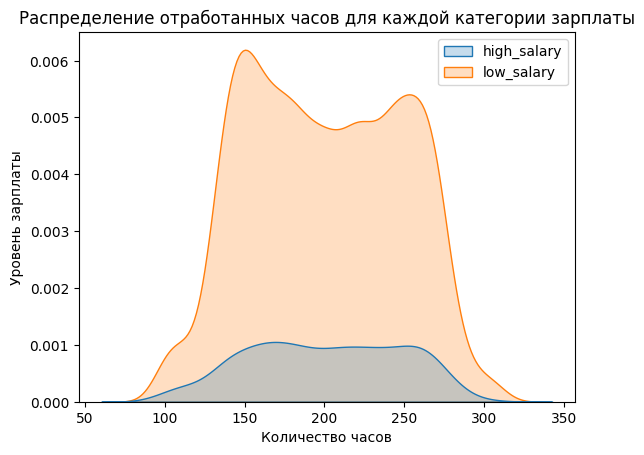

In [171]:
sns.kdeplot(time_sal, fill = True)
plt.title('Распределение отработанных часов для каждой категории зарплаты')
plt.ylabel('Уровень зарплаты')
plt.xlabel('Количество часов')
plt.show()

In [ ]:
time_sal.describe() # посчитаем статистические характеристики для каждого уровня зарплаты

,high_salary,low_salary
count,1237.000000,7316.000000
mean,199.867421,200.996583
std,47.710446,50.832214
min,96.000000,96.000000
25%,161.000000,155.000000
50%,199.000000,199.000000
75%,241.000000,246.000000
max,307.000000,310.000000


Статистические параметры не изменились, а графике ярко выраженное бимодальное распределение low_salary сгладилось не сильно. Для статистической проверки гипотезы при бимодальном распределении данных используется метод, основанный на оценке плотности ядра (Kernel Density Estimation, KDE). Этот метод позволяет оценить плотность вероятности данных и проверить гипотезу о наличии двух мод в распределении.

На диаграмме размаха не видно разницы. Но вычисления средней зарплаты, показывают, что среднее время работы сотрудников с низкой зарплатой выше, чем для сотрудников с высокой. А поставлена задача, проверить гипотезу, что сотрудники с высоким окладом, проводят на работе больше времени, чем сотрудники с низким окладом.

В таком случае, можно провести статистический анализ, чтобы убедиться, что различие в средних значениях выборок статистически значимо. Это поможет определить, действительно ли разница между средними значениями является реальной или случайной.

#8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [206]:
df = pd.read_csv('https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1', sep=',', engine='python')
df.to_csv('df.csv', index=False) # запишем df в csv файл

In [236]:
fired = df[df['left'] == 1] # создадим датафрейм, где содержатся только уволившиеся сотрудники
working = df[df['left'] == 0] # создадим датафрейм, где содержатся только работающие сотрудники
working_promotion_last_5years = working[working['promotion_last_5years'] == 1].shape[0]/df[df['promotion_last_5years'] == 1].shape[0] #  для сотрудников с повышением, где shape[0] - кол-во строк
fired_promotion_last_5years = fired[fired['promotion_last_5years'] == 1].shape[0]/df[df['promotion_last_5years'] == 1].shape[0] #  для сотрудников с повышением, где shape[0] - кол-во строк

In [242]:
print('Доля сотрудников с повышением за последние 5 лет из числа \n уволившихся: ', fired_promotion_last_5years)
print('Доля сотрудников с повышением за последние 5 лет из числа \n работающих: ', working_promotion_last_5years)

Доля сотрудников с повышением за последние 5 лет из числа 
 уволившихся:  0.05956112852664577
Доля сотрудников с повышением за последние 5 лет из числа 
 работающих:  0.9404388714733543


In [248]:
fired_satisfaction_level = fired['satisfaction_level'].mean() # посчитаем среднюю степень удовлетворенности
working_satisfaction_level = working['satisfaction_level'].mean()
print('Средняя степень удовлетворенности уволившихся сотрудников: ', fired_satisfaction_level)
print('Средняя степень удовлетворенности работающих сотрудников: ', working_satisfaction_level)


Средняя степень удовлетворенности уволившихся сотрудников:  0.4400980117614114
Средняя степень удовлетворенности работающих сотрудников:  0.666809590479524


In [252]:
fired_time_spend_company = fired['number_project'].mean() # посчитаем среднее количество проектов
working_time_spend_company = working['number_project'].mean()
print('Среднее количество проектов уволившихся сотрудников: ', fired_time_spend_company)
print('Среднее количество проектов работающих сотрудников: ', working_time_spend_company)

Среднее количество проектов уволившихся сотрудников:  3.8555026603192384
Среднее количество проектов работающих сотрудников:  3.786664333216661


# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [253]:
lda = df.drop(['department', 'salary'], axis=1) # удалим столбцы department и salary
lda

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [254]:
lda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


In [256]:
lda.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [258]:
lda.isnull().sum() # посчитаем пропущенные значения с помощью методов .isnull() и .sum().

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dtype: int64

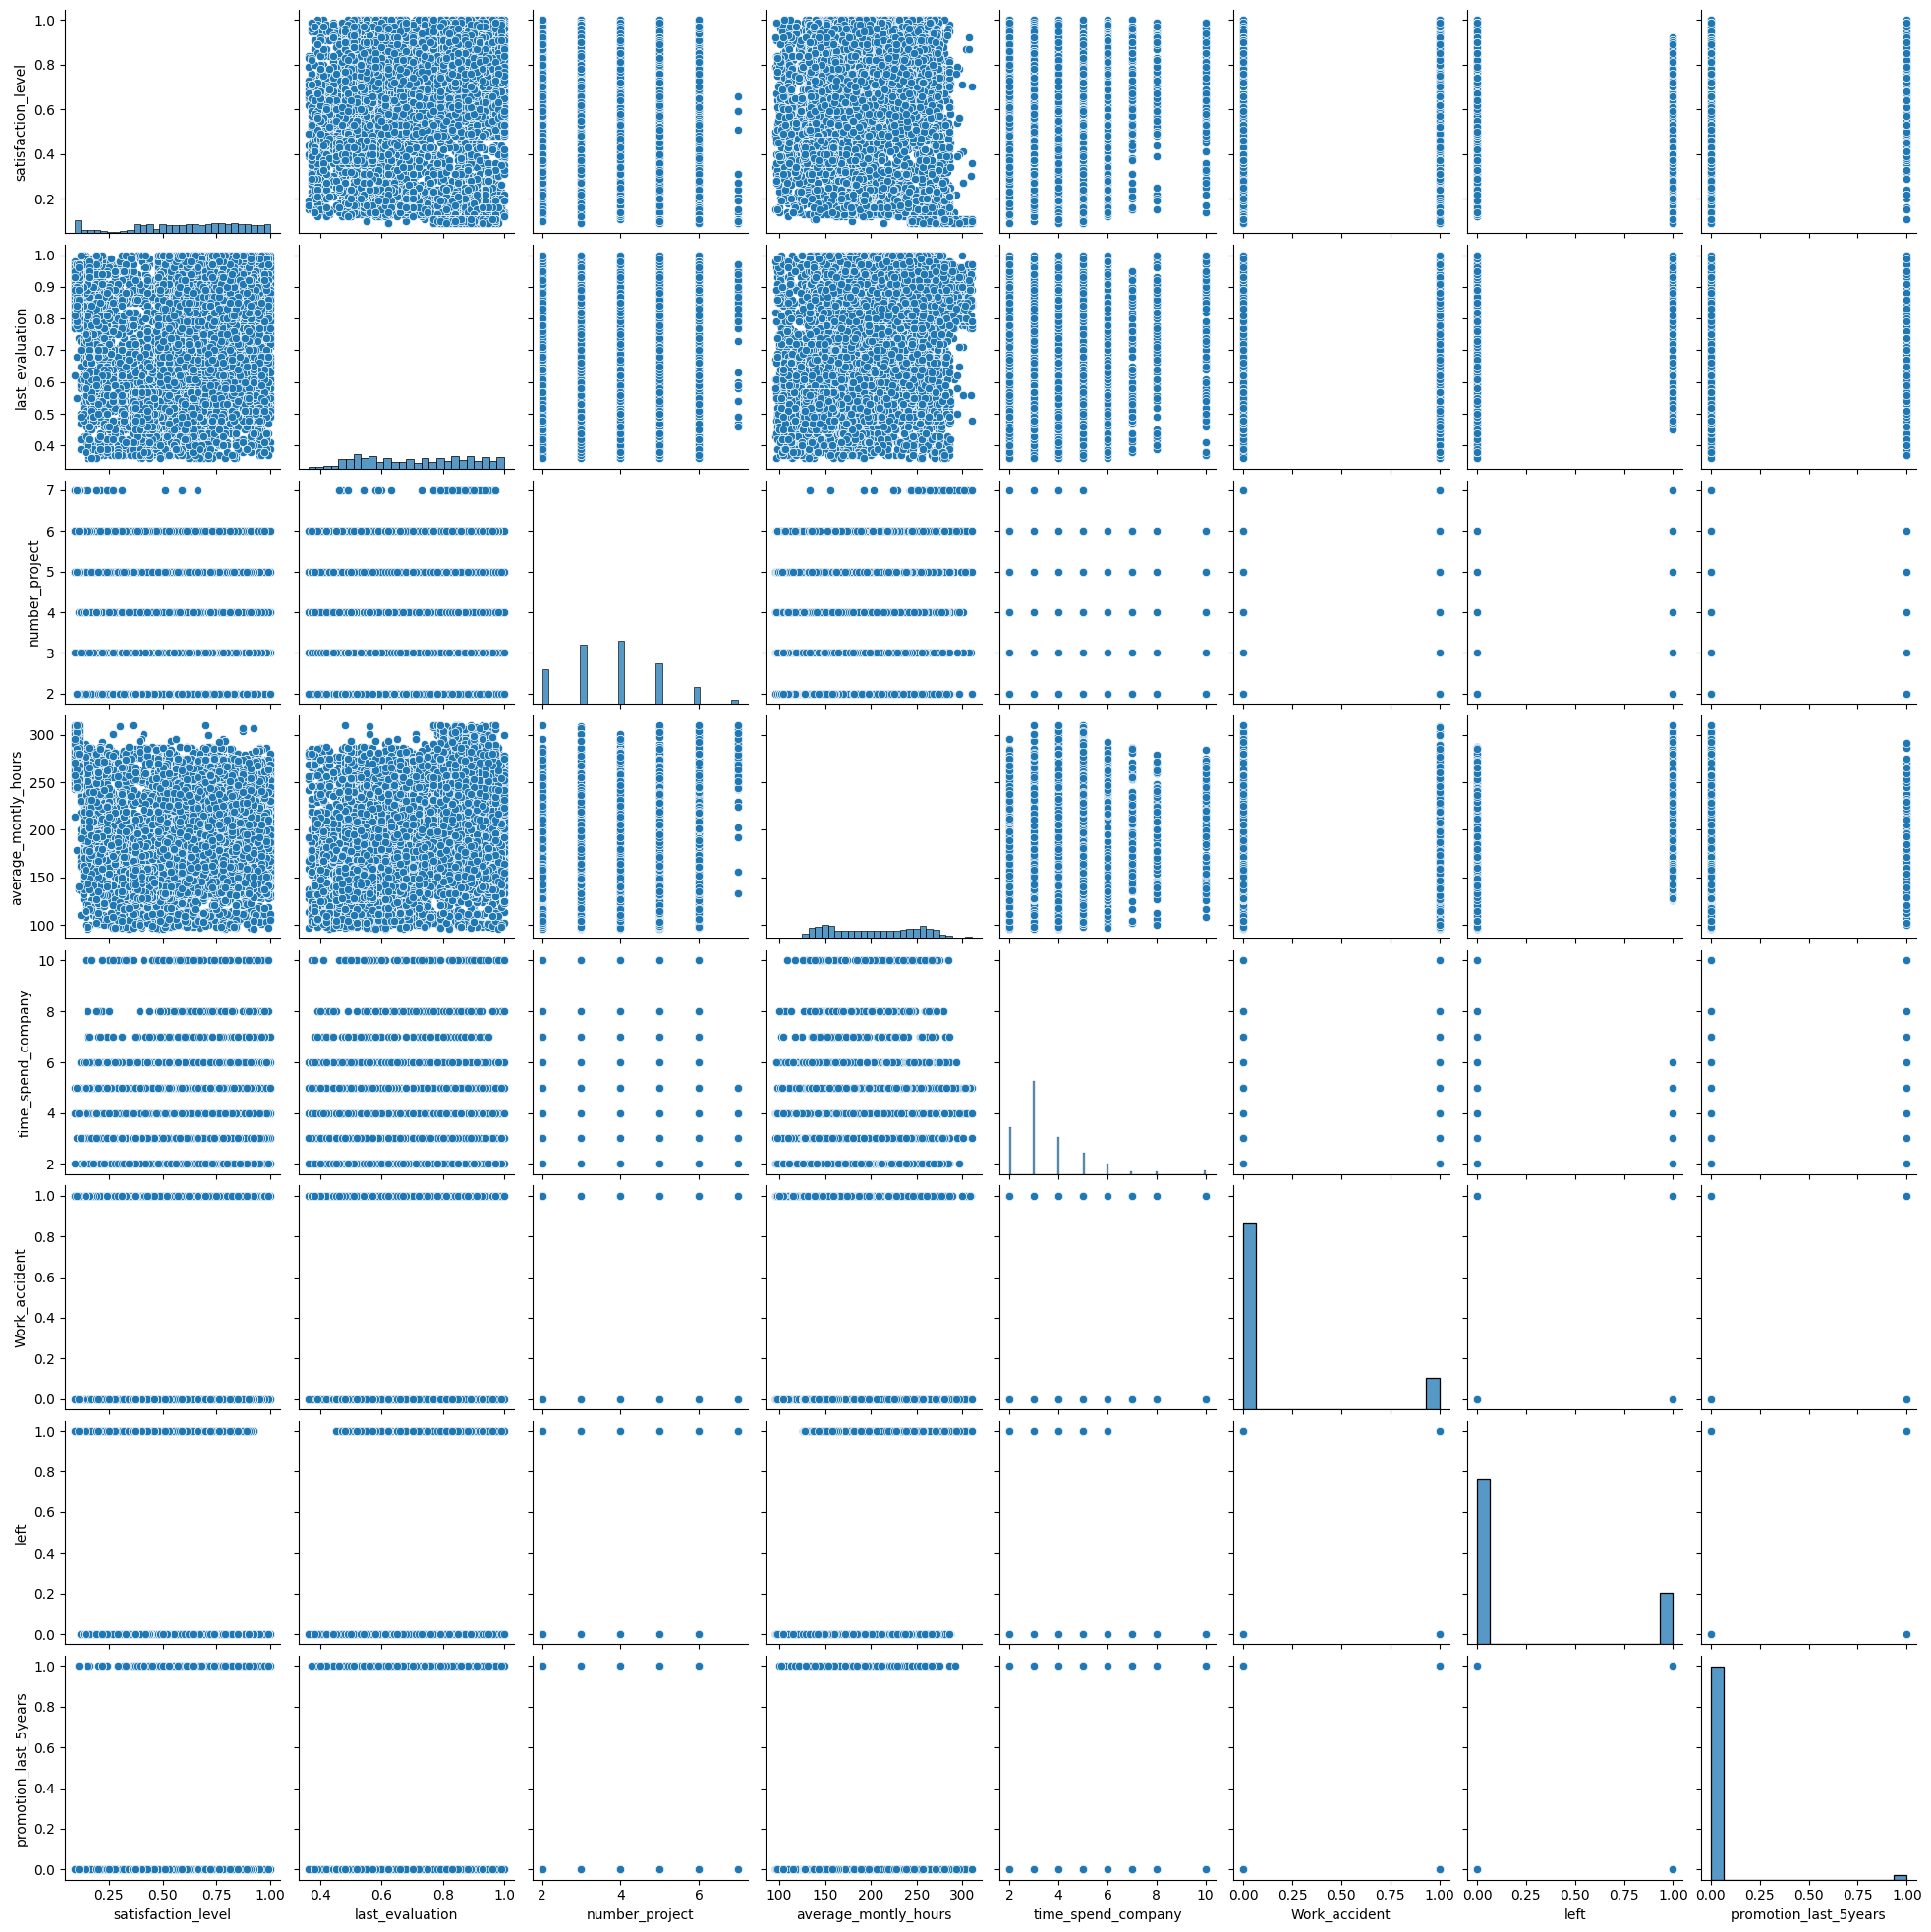

In [260]:
sns.pairplot(lda)

In [261]:
lda.corr() # посчитаем коэффициенты корреляции между всеми показателями

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

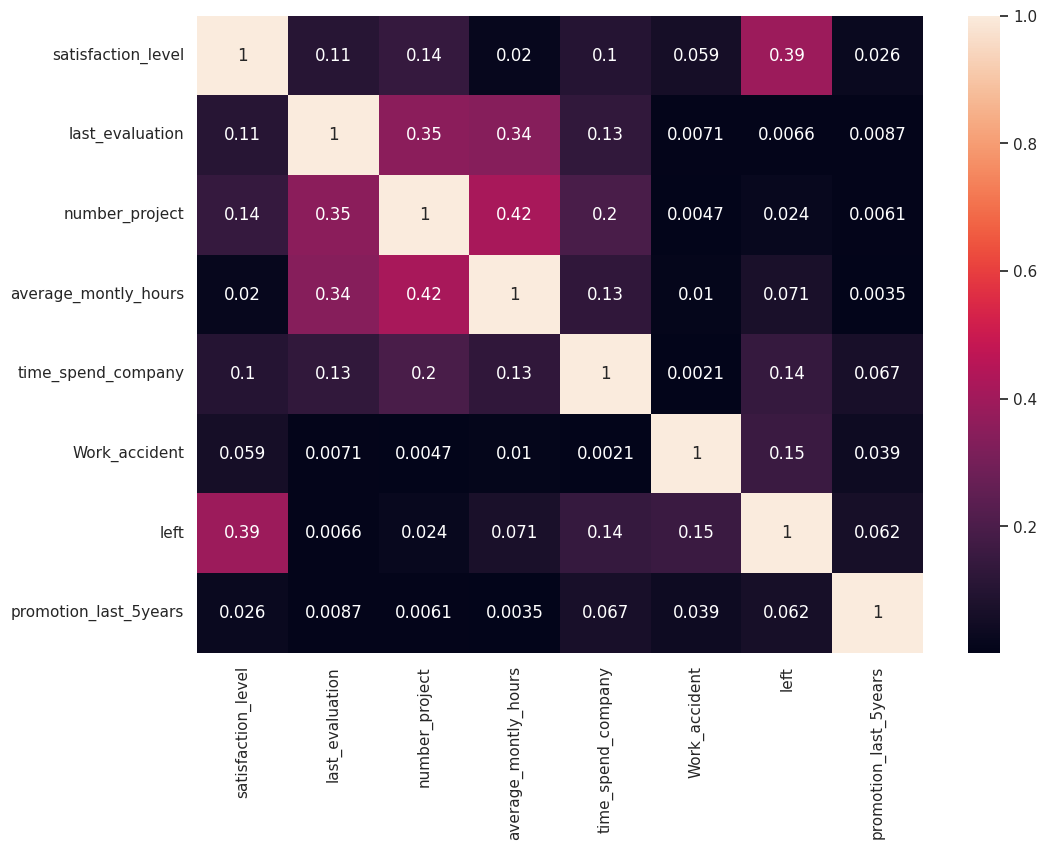

In [263]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # визуализируем взаимосвязи при помощи тепловой карты
sns.heatmap(lda.corr().abs(), annot=True)

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты